In [11]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations


In [12]:
A = [[8.3, 8.2],
     [-10.2, 15.2],
     [14.5, -7.3]]

B = [134, 102, 141]

A = np.array(A)
B = np.array(B)

In [13]:
line_crossings = np.array([np.linalg.solve(A[list(i)], B[list(i)]) for i in combinations(range(len(B)), 2)])

padding = 5
plot_x1_min_max = line_crossings[:, 0].min() - padding, line_crossings[:, 0].max() + padding
plot_x2_min_max = line_crossings[:, 1].min() - padding, line_crossings[:, 1].max() + padding
line_crossings

array([[ 5.72163966, 10.55004766],
       [11.89147028,  4.30497521],
       [19.78758394, 19.98903659]])

In [14]:
def get_function_value(a1, a2, b, x1):
    return (a1 * x1 - b) / a2

all_lines = [
    [(plot_x1_min_max[0], plot_x1_min_max[1]), (get_function_value(*a, b, plot_x1_min_max[0]), get_function_value(*a, b, plot_x1_min_max[1]))]
    for a, b in zip(A, B)
]

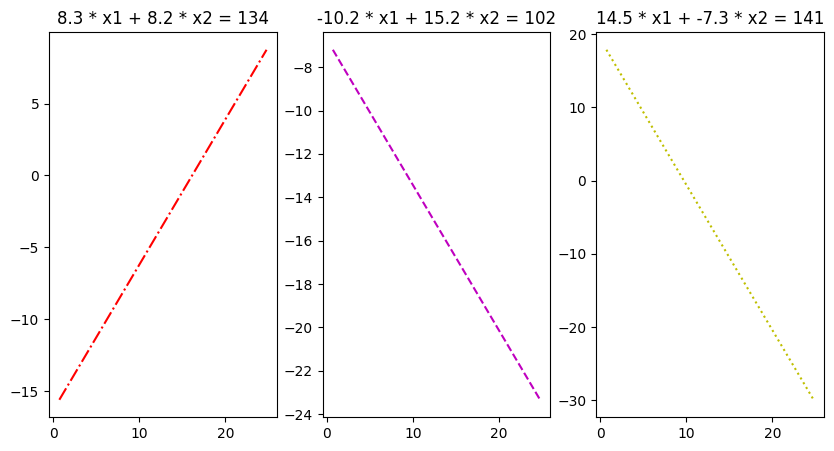

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
styles = ['-.r', '--m', ':y']
for l, a, s, a1a2, b in zip(all_lines, ax, styles, A, B):
    a.plot(*l, s)
    a.set_title('{} * x1 + {} * x2 = {}'.format(*a1a2, b))




In [16]:
def main_plot_func():
    for i, (l, s, a1a2, b) in enumerate(zip(all_lines, styles, A, B)):
        plt.plot(*l, s, label='{} * x1 + {} * x2 = {}'.format(*a1a2, b))
        plt.annotate(f'f[{i}]', (l[0][1], l[1][1]))
    plt.plot(line_crossings[:, 0], -line_crossings[:, 1], '.g')

    X = np.linspace(line_crossings[:, 0].min(), line_crossings[:, 0].max())

    plt.fill_between(X, get_function_value(*A[1], B[1], X), np.min([get_function_value(*A[0], B[0], X), get_function_value(*A[2], B[2], X)], axis=0), color='green',
                     alpha=0.5)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('all lines')
    plt.legend(loc='best')




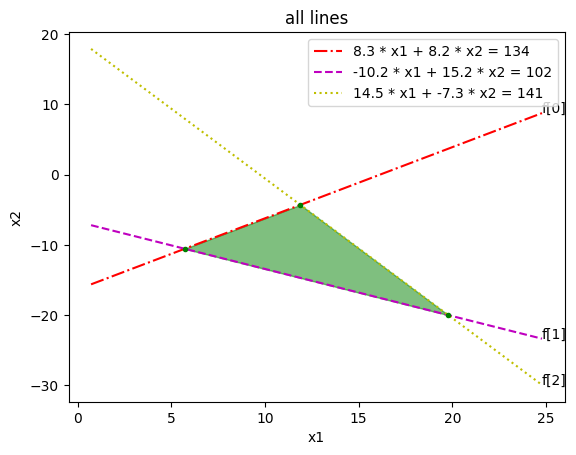

In [17]:
main_plot_func()